

## 1. Order Scenarios
1. Overall sales of the product.
2. Correlation between different types of products.
3. Predict on the time spent for fulfilling an order.
4. The distribution of time that takes for fulfilling an order.

#### Order Scenario 1: Overall sales of the product

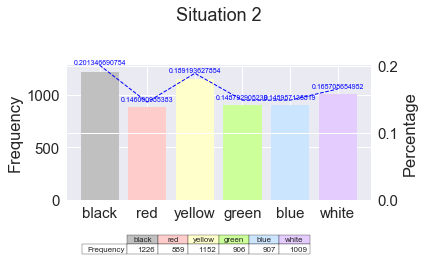

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import csv


data = {}
with open('./data/order/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            data[row['id']] = {k:v for k,v in row.items() if k <> 'id'}

        
with open('./data/order1/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            data[row['id']] = {k:v for k,v in row.items() if k <> 'id'}
        
        
labels = 'black', 'red', 'yellow', 'green', 'blue', 'white'
colors = ['#C0C0C0','#FFCCCC','#FFFFCC','#ccff99','#CCE5FF','#E5CCFF']
product = {'black':0, 'red':0, 'yellow':0, 'green':0, 'blue':0, 'white':0}

for key, val in data.items():
    for orderKey, orderVal in val.items():
        if orderKey in product:
            product[orderKey] += int(orderVal)

cellText = []
for i in labels:
    cellText.append(product[i])

percentage = []
sumOrder = 0
for i in cellText:
    sumOrder += i

for i in cellText:
    percentage.append(float(i)/float(sumOrder))


fig, (title, ax, ax1) = plt.subplots(nrows=3, ncols=1, gridspec_kw = {'height_ratios':[0.1, 9, 1]})
# title
title.axis('off')
title.set_title('Situation 2')

# bar chart
ax.bar(labels, cellText, color=colors)
ax.set_ylabel('Frequency')

# line chart
ax2 = ax.twinx()
ax2.plot(labels, percentage, "b--", linewidth=1)
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, max(percentage))
for a, b in zip(labels, percentage):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=7, color='blue')  

# table
the_table = ax1.table(cellText=[cellText],
                      rowLabels=['Frequency'],
                      colColours=colors,
                      colLabels=labels,
                      colWidths=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                      loc='center')
ax1.axis('off')
plt.subplots_adjust(top=0.8, bottom=0.2)
plt.tight_layout()
plt.show()

#### Order Scenario 2: Correlation between different types of products.

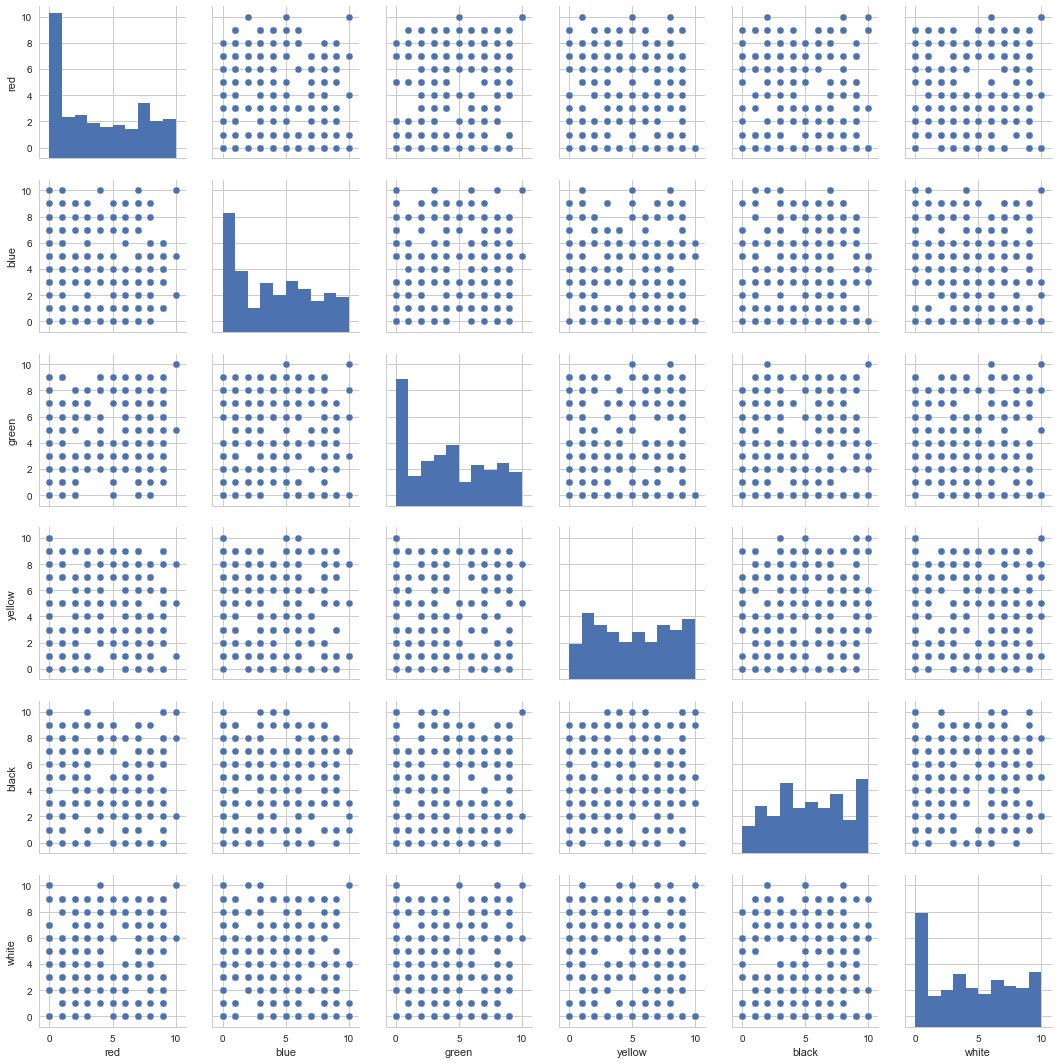

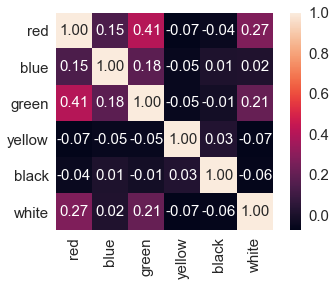

In [96]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("./data/order/ws_orderinfo_orders_server.csv")
df2 = pd.read_csv("./data/order1/ws_orderinfo_orders_server.csv")


df3 = df.append(df2, ignore_index=True)


# Scatter Plot - color vs color
sns.set(style='whitegrid', context='notebook')
cols = ['red', 'blue', 'green', 'yellow', 'black','white']
sns.pairplot(df3[cols], size=2.5)
plt.show()

# Correlation Matrix - color vs color
cm = np.corrcoef(df3[cols].values.T) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15}, 
                 yticklabels=cols, 
                 xticklabels=cols) 
plt.show()

#### Order Scenario 4: The distribution of time that takes for fulfilling an order.

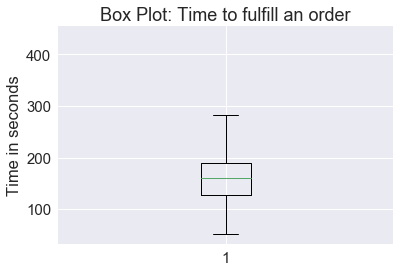

In [97]:
import csv
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Here is the data read from the csv file
results = []

with open('./data/order/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            shipdate = datetime.datetime.strptime(row['shipdate'], "%Y-%m-%d %H:%M:%S")
            takendate = datetime.datetime.strptime(row['tokendate'], "%Y-%m-%d %H:%M:%S")
            results.append((shipdate - takendate).total_seconds())
with open('./data/order1/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            shipdate = datetime.datetime.strptime(row['shipdate'], "%Y-%m-%d %H:%M:%S")
            takendate = datetime.datetime.strptime(row['tokendate'], "%Y-%m-%d %H:%M:%S")
            results.append((shipdate - takendate).total_seconds())

            
# Box plot
fig, ax = plt.subplots()
ax.set_title('Box Plot: Time to fulfill an order')
ax.set_ylabel('Time in seconds')
ax.boxplot(results)
plt.show()


## 2. User scenario: 
1. Preference of type of product for a certain user, which is measured on the number of products of the specific type that the user has purchased. 
*Use the new order data generated from order1.jar*

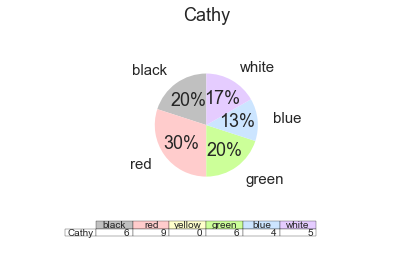

In [98]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import csv

# Here is the order id you want to visualize
order_id = '105'

# Here is the data read from csv file
data = {}
with open('./data/order1/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
      data[row['id']] = {k:v for k,v in row.items() if k <> 'id'}

# Here is the lable of the order
labels = ['black', 'red', 'yellow', 'green', 'blue', 'white']

# Here is the style of the pie chart
colors = ['#C0C0C0','#FFCCCC','#FFFFCC','#ccff99','#CCE5FF','#E5CCFF']


fracs = []
row1 = data[order_id]
customer = row1['customer']
for i in labels:
	fracs.append(row1[i])

# Plot assignment & Title
fig, (title, ax, ax1) = plt.subplots(nrows=3, ncols=1, gridspec_kw = {'height_ratios':[0.1, 9, 1]})
title.axis('off')
title.set_title(customer)


# pie chart
pieLabels = []
pieFracs = []
pieColors = []
count = -1
for i in fracs:
	count += 1
	if i != '0':
		pieFracs.append(i)
		pieLabels.append(labels[count])
		pieColors.append(colors[count])

ax.pie(pieFracs, labels=pieLabels, colors=pieColors, autopct='%.0f%%', shadow=False, startangle=90, labeldistance=1.3)
ax.axis('equal')


# Table
cellText = [fracs]
the_table = ax1.table(cellText=[fracs],
                      rowLabels=[customer],
                      colColours=colors,
                      colLabels=labels,
                      colWidths=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                      loc='center')
ax1.axis('off')

# plot
plt.subplots_adjust(top=0.8, bottom=0.2)
plt.tight_layout()
plt.show()